# Christian Sutton   
Module 8
10/23/20  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

data = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod8/assignment08_dataset.csv")

In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Problem 1
**[10 pts] How many species must be there in the dataset?**

After ploting the data it looks like 3 clusters 

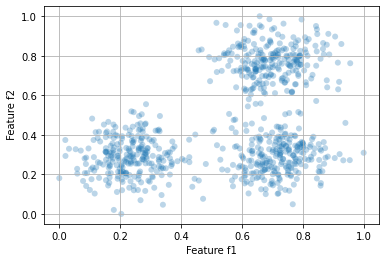

In [2]:
# three clusters shown here


#scale the data
data[['f1','f2']] = MinMaxScaler().fit_transform(data[['f1','f2']])
#plot
fig, ax = plt.subplots() 
x, y = data[['f1']],data[['f2']]   
ax.scatter(x, y, alpha=0.3, edgecolors='none')
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

# Problem 2 
**[10 pts] Find the rough feature ranges to classify these species correctly. It might be a good idea to do this step visually from some data plots.**  

From plot above:    
cluster 1 (bottom left)  f1: [0,.5] , f2:[0,.55]  
cluster 2 (bottom right) f1: (.5, 1], f2:[0,.5]  
cluster 3 (top right)    f1: [.45,.9] , f2(.5,1]  

# Problem 3  
**Clean the points that are around the boundaries of the cluster (these points might be due to errors, anomalies, or they are simply outliers). This step is done to refine feature boundaries so that a scientist can classify the species manually, reliably, and with a high generalization. (An example statement, "Species 1 has feature 1 in the range of [0-1.5]")**  



In [3]:
#clean points from data 
data3 = data 
data3 = data3.drop(data3[(data3.f1 >=.45) & (data3.f1 <=.52)& (data3.f2 <=.6) ].index)
data3 = data3.drop(data3[(data3.f1 >=.5) & (data3.f2 <=.55) & (data3.f2 >=.47)].index)



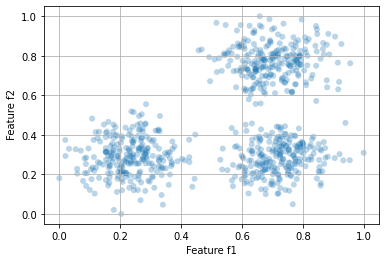

In [4]:
#plot manually cleaned data
fig, ax = plt.subplots() 
x, y = data3[['f1']],data3[['f2']]   
ax.scatter(x, y, alpha=0.3, edgecolors='none')
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

# Problem 4 
**[20 pts] Use K-means clustering to find anomalies (Hint: find cluster data points that are far to the centroid).**  

In [5]:
from sklearn.cluster import KMeans

data4 = data

#three clusters
KM = KMeans(3)

#original data with third column representing predicted cluster number.
data4['cluster_Number']=pd.DataFrame(data=pd.DataFrame(data= KM.fit_predict(data4)))
data7 = data4
centers = KM.cluster_centers_

In [6]:
centers

array([[0.23445904, 0.28670142],
       [0.6989484 , 0.77183616],
       [0.71652493, 0.28980215]])

In [7]:
data4.head()

,f1,f2,cluster_Number
0,0.667984,0.804716,1
1,0.204201,0.242466,0
2,0.630419,0.703402,1
3,0.577449,0.189165,2
4,0.819535,0.884299,1


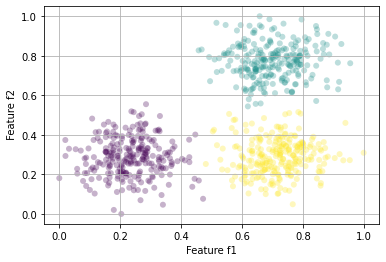

In [8]:
#plot clusters as determined by 
fig, ax = plt.subplots() 
x, y = data4[['f1']],data4[['f2']]   
ax.scatter(x, y, c=data4['cluster_Number'], alpha=0.3, edgecolors='none' )
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

In [9]:
# Method for distance measurement - taken from mod 8 workbook

from collections import defaultdict
from functools import partial
import numpy as np

def get_centroids(_X, _y):
    U = defaultdict(partial(np.ndarray, 0))
    Cn = defaultdict(int)
    for x, c in zip(_X, _y):
        U[c] = x if Cn[c] == 0 else U[c] + x
        Cn[c] += 1
    for c in U.keys():
        U[c] /= Cn[c]
    return U

def distance_intra_cluster(_X, _y_km, _dist):
    # Compute intra-cluster errors
    U = get_centroids(_X, _y_km)
    En = defaultdict(partial(np.ndarray, 0))
    Cn = defaultdict(int)
    for x, c in zip(_X, _y_km):
        En[c] = _dist(x, U[c]) if Cn[c] == 0 else En[c] + _dist(x, U[c])
        Cn[c] += 1
    for c in U.keys():
        En[c] /= Cn[c]
    return En

#distance measure, L2 norm
dist = lambda a, b : np.sqrt((a-b)**2)

intracluster_vector = distance_intra_cluster(data4[[ 'f1','f2']].to_numpy(), data4['cluster_Number'].to_numpy(), dist)
for c in sorted(intracluster_vector.keys()):
        intracluster_magnitude = np.linalg.norm(intracluster_vector[c])
        print(f'cluster {c} intra-distance= {intracluster_magnitude:.3f}')

cluster 0 intra-distance= 0.104
cluster 1 intra-distance= 0.105
cluster 2 intra-distance= 0.101


In [10]:
# edit the outliers based on intra cluster distances 
data4 = data4.drop(data4[(data4.f1 >=.23+.104*1.5) &(data4.f1 <=.71-.101*1.5)].index) #&(data4.f2 <=.6) ].index
data4 = data4.drop(data4[(data4.f1 >=.5) & (data4.f2 <=.55)& (data4.f2 >=.45)].index)
data4 = data4.drop(data4[(data4.f1 >=.70+.101*1.5)].index)
data4 = data4.drop(data4[(data4.f1 <= .23-.104*1.5)].index)

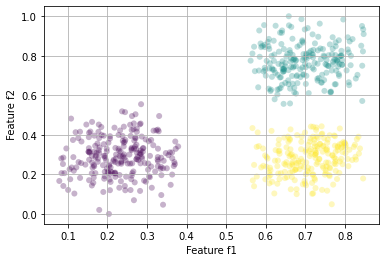

In [11]:
#plot cleaned data
fig, ax = plt.subplots() 
x, y = data4[['f1']],data4[['f2']]   
ax.scatter(x, y, c=data4['cluster_Number'], alpha=0.3, edgecolors='none' )
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

# Problem 5 
**[20 pts] Use DBSCAN clustering to find anomalies.**   



In [12]:
from sklearn.cluster import DBSCAN
data5 = data
DB = DBSCAN(eps=.5, min_samples=3)
data5['cluster_Number']=pd.DataFrame(data= DB.fit_predict(data5))
#DBSCAN_compare['DB_pred']= pd.DataFrame(data= DB.fit_predict(data5))

In [13]:
data4.head()

,f1,f2,cluster_Number
0,0.667984,0.804716,1
1,0.204201,0.242466,0
2,0.630419,0.703402,1
3,0.577449,0.189165,2
4,0.819535,0.884299,1


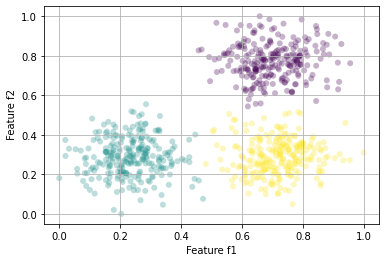

In [14]:
# DBSCAN doen't seem to give me any new information that problem 4 didn't. these are the exact same clusters
ig, ax = plt.subplots() 
x, y = data5[['f1']],data5[['f2']]   
ax.scatter(x, y, c=data5['cluster_Number'], alpha=0.3, edgecolors='none' )
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

In [15]:
intracluster_vector = distance_intra_cluster(data5[[ 'f1','f2']].to_numpy(), data5['cluster_Number'].to_numpy(), dist)
for c in sorted(intracluster_vector.keys()):
        intracluster_magnitude = np.linalg.norm(intracluster_vector[c])
        print(f'cluster {c} intra-distance= {intracluster_magnitude:.3f}')

cluster 0 intra-distance= 0.105
cluster 1 intra-distance= 0.104
cluster 2 intra-distance= 0.101


In [16]:
# edit the outliers based on intra cluster distances 
data5 = data5.drop(data5[(data5.f1 >=.23+.104*1.5) &(data5.f1 <=.71-.101*1.5)].index) #&(data4.f2 <=.6) ].index
data5 = data5.drop(data5[(data5.f1 >=.5) & (data5.f2 <=.55)& (data5.f2 >=.45)].index)
data5 = data5.drop(data5[(data5.f1 >=.70+.101*1.5)].index)
data5 = data5.drop(data5[(data5.f1 <= .23-.104*1.5)].index)

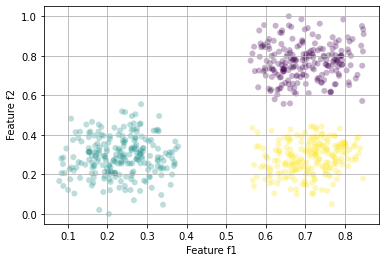

In [17]:
#cleaned data for problem 5
fig, ax = plt.subplots() 
x, y = data5[['f1']],data5[['f2']]   
ax.scatter(x, y, c=data5['cluster_Number'], alpha=0.3, edgecolors='none' )
ax.set_ylabel(" Feature f2")
ax.set_xlabel("Feature f1")
ax.grid(True)
plt.show()

# Problem 6
**[40 pts] Using the cleaned dataset, develop a decision tree classifier to model the species and show the model decision tree.**  


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

[Text(133.92000000000002, 181.2, 'X[0] <= 0.47\nentropy = 0.666\nsamples = 660\nvalue = [233, 216, 211]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 233\nvalue = [233, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.5\nsamples = 427\nvalue = [0, 216, 211]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 211\nvalue = [0, 0, 211]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 216\nvalue = [0, 216, 0]')]

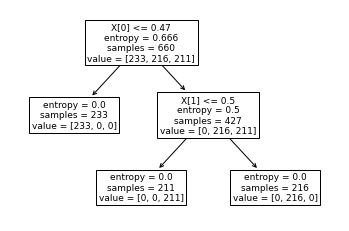

In [19]:
#cleaned data from problem 4
#cleaned data shows 3 clusters 233, 211, 216

tree = DecisionTreeClassifier()
tree_pred = tree.fit(data4[['f1','f2']],data4['cluster_Number'])
plot_tree(tree_pred,fontsize=9) 

# Problem 7
**[20 pts bonus] Show that, in fact, it helped to clean the outliers as above, before generating the decision tree.**  


[Text(167.4, 181.2, 'X[0] <= 0.477\nentropy = 0.667\nsamples = 750\nvalue = [248, 252, 250]'),
 Text(83.7, 108.72, 'X[1] <= 0.691\nentropy = 0.016\nsamples = 254\nvalue = [2, 252, 0]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 252\nvalue = [0, 252, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.53\nentropy = 0.5\nsamples = 496\nvalue = [246, 0, 250]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 250\nvalue = [0, 0, 250]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 246\nvalue = [246, 0, 0]')]

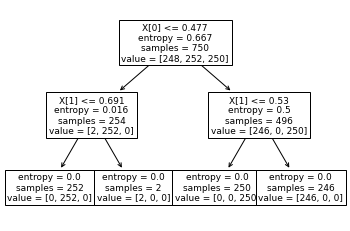

In [20]:
# show leaves on uncleaned datset

#uncleaned set shows an extra cluster of two values for a total of 4 clusters 

tree = DecisionTreeClassifier()
tree_pred = tree.fit(data7[['f1','f2']],data7['cluster_Number'])
plot_tree(tree_pred,fontsize=9)
